# This Simulation Jupyter Notebook contains the code to do experiments by using
+ 1. new graph features
+ 2. original connectivity features
+ 3. the combination of both `[connectivity features, graph features]`  

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pdb

In [2]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, recall_score
scoring = {
    'accuracy':    make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

In [3]:
# connectivity types
correlation = 'correlation'
partial = 'partial correlation'
tangent = 'tangent'
measure = [correlation, partial, tangent]

# atlas
atlas = "BASC197"

# classifiers
lr = "LR"
lsvm = "LSVM"
ksvm = "kSVM"
rf = "RF"
ab = "AB"

In [4]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_corr = LogisticRegression(C = 0.01)
lr_part = LogisticRegression(C = 1)
lr_tang = LogisticRegression(C = 1)

In [5]:
# Linear SVM
from sklearn.svm import LinearSVC

lsvm_corr = LinearSVC(C = 0.01)
lsvm_part = LinearSVC(C = 1)
lsvm_tang = LinearSVC(C = 1)

In [6]:
# Kernel SVM
from sklearn.svm import SVC
ksvm_corr = SVC(gamma = 'auto', C = 100)
ksvm_part = SVC(gamma = 'auto', C = 1000)
ksvm_tang = SVC(gamma = 'auto', C = 100)

In [7]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_corr = RandomForestClassifier(max_depth = 8, random_state = 0)
rf_part = RandomForestClassifier(max_depth = 8, random_state = 0)
rf_tang = RandomForestClassifier(max_depth = 8, random_state = 0)


# Adaboost
from sklearn.ensemble import AdaBoostClassifier

ab_corr = AdaBoostClassifier(n_estimators = 100)
ab_part = AdaBoostClassifier(n_estimators = 100)
ab_tang = AdaBoostClassifier(n_estimators = 100)

In [8]:
# stratified splitting
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

In [9]:
# do experiments on all the three connectivity types of one atlas
def one_atlas(X_correlation, X_partial, X_tangent, y):
    # Logistic Regression
    from crossvalidation import CrossValidation
    lr_corr_scores = CrossValidation(lr_corr, X_correlation, y, skf)
    lr_part_scores = CrossValidation(lr_part, X_partial,     y, skf)
    lr_tang_scores = CrossValidation(lr_tang, X_tangent,     y, skf)

    from scores import getScores
    [lr_corr_acc, lr_corr_sen, lr_corr_spe] = getScores(lr_corr_scores)
    [lr_part_acc, lr_part_sen, lr_part_spe] = getScores(lr_part_scores)
    [lr_tant_acc, lr_tang_sen, lr_tang_spe] = getScores(lr_tang_scores)
    
    from roc import plotROC
    import matplotlib.pylab as pl
    plotROC(lr_corr, X_correlation, y, skf, atlas, correlation, lr)
    plotROC(lr_part, X_partial, y, skf, atlas, partial, lr)
    plotROC(lr_tang, X_tangent, y, skf, atlas, tangent, lr)
    
    # Linear SVM
    lsvm_corr_scores = CrossValidation(lsvm_corr, X_correlation, y, skf)
    lsvm_part_scores = CrossValidation(lsvm_part, X_partial,     y, skf)
    lsvm_tang_scores = CrossValidation(lsvm_tang, X_tangent,     y, skf)

    from scores import getScores
    [lsvm_corr_acc, lsvm_corr_sen, lsvm_corr_spe] = getScores(lsvm_corr_scores)
    [lsvm_part_acc, lsvm_part_sen, lsvm_part_spe] = getScores(lsvm_part_scores)
    [lsvm_tant_acc, lsvm_tang_sen, lsvm_tang_spe] = getScores(lsvm_tang_scores)

    plotROC(lsvm_corr, X_correlation, y, skf, atlas, correlation, lsvm)
    plotROC(lsvm_part, X_partial, y, skf, atlas, partial, lsvm)
    plotROC(lsvm_tang, X_tangent, y, skf, atlas, tangent, lsvm)
    
    # Kernel SVM
    ksvm_corr_scores = CrossValidation(ksvm_corr, X_correlation, y, skf)
    ksvm_part_scores = CrossValidation(ksvm_part, X_partial,     y, skf)
    ksvm_tang_scores = CrossValidation(ksvm_tang, X_tangent,     y, skf)

    [ksvm_corr_acc, ksvm_corr_sen, ksvm_corr_spe] = getScores(ksvm_corr_scores)
    [ksvm_part_acc, ksvm_part_sen, ksvm_part_spe] = getScores(ksvm_part_scores)
    [ksvm_tant_acc, ksvm_tang_sen, ksvm_tang_spe] = getScores(ksvm_tang_scores)

    plotROC(ksvm_corr, X_correlation, y, skf, atlas, correlation, ksvm)
    plotROC(ksvm_part, X_partial, y, skf, atlas, partial, ksvm)
    plotROC(ksvm_tang, X_tangent, y, skf, atlas, tangent, ksvm)
    
    # Random Forrest
    rf_corr_scores = CrossValidation(rf_corr, X_correlation, y, skf)
    rf_part_scores = CrossValidation(rf_part, X_partial,     y, skf)
    rf_tang_scores = CrossValidation(rf_tang, X_tangent,     y, skf)

    [rf_corr_acc, rf_corr_sen, rf_corr_spe] = getScores(rf_corr_scores)
    [rf_part_acc, rf_part_sen, rf_part_spe] = getScores(rf_part_scores)
    [rf_tant_acc, rf_tang_sen, rf_tang_spe] = getScores(rf_tang_scores)

    plotROC(rf_corr, X_correlation, y, skf, atlas, correlation, rf)
    plotROC(rf_part, X_partial, y, skf, atlas, partial, rf)
    plotROC(rf_tang, X_tangent, y, skf, atlas, tangent, rf)
    
    # adaboost
    ab_corr_scores = CrossValidation(ab_corr, X_correlation, y, skf)
    ab_part_scores = CrossValidation(ab_part, X_partial,     y, skf)
    ab_tang_scores = CrossValidation(ab_tang, X_tangent,     y, skf)

    [ab_corr_acc, ab_corr_sen, ab_corr_spe] = getScores(ab_corr_scores)
    [ab_part_acc, ab_part_sen, ab_part_spe] = getScores(ab_part_scores)
    [ab_tant_acc, ab_tang_sen, ab_tang_spe] = getScores(ab_tang_scores)


    plotROC(ab_corr, X_correlation, y, skf, atlas, correlation, ab)
    plotROC(ab_part, X_partial, y, skf, atlas, partial, ab)
    plotROC(ab_tang, X_tangent, y, skf, atlas, tangent, ab)
    
    #summary
    from IPython.display import HTML, display

    test=[["","","Correlation"," "," ","Parital Corr",""," ","Tangent",""],

          ["Classifier","Sensitivity","Specificity", "Accuracy",\
           "Sensitivity","Specificity", "Accuracy",\
           "Sensitivity","Specificity", "Accuracy"],

          ["LR",lr_corr_sen,lr_corr_spe,lr_corr_acc,\
           lr_part_sen,lr_part_spe,lr_part_acc,\
           lr_tang_sen,lr_tang_spe,lr_tant_acc
          ],

          ["lSVM",lsvm_corr_sen,lsvm_corr_spe,lsvm_corr_acc,\
           lsvm_part_sen,lsvm_part_spe,lsvm_part_acc,\
           lsvm_tang_sen,lsvm_tang_spe,lsvm_tant_acc
          ],

          ["kSVM",ksvm_corr_sen,ksvm_corr_spe,ksvm_corr_acc,\
           ksvm_part_sen,ksvm_part_spe,ksvm_part_acc,\
           ksvm_tang_sen,ksvm_tang_spe,ksvm_tant_acc
          ],

          ["RF",rf_corr_sen,rf_corr_spe,rf_corr_acc,\
           rf_part_sen,rf_part_spe,rf_part_acc,\
           rf_tang_sen,rf_tang_spe,rf_tant_acc
          ], 

          ["AB",ab_corr_sen,ab_corr_spe,ab_corr_acc,\
           ab_part_sen,ab_part_spe,ab_part_acc,\
           ab_tang_sen,ab_tang_spe,ab_tant_acc
          ]
         ]

    print("Test:")
    print("===========================================================================================")
    display(HTML(
       '<table><tr>{}</tr></table>'.format(
           '</tr><tr>'.join(
               '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in test))
    ))

In [10]:
def find_atlas(file_name):
    atlas_names = ['GroupICA', 'Dict', 'CC400', 'CC200', 'BASC444', 'BASC197', 'AAL', 'Power']

    for atlas_name in atlas_names:
        if atlas_name in file_name:
            atlas = atlas_name
            break
    return atlas

In [11]:
# do experiment on one atlas given the names of three new graph features
def prepare_data(corr_graph_file, part_graph_file, tang_graph_file):

    
    import numpy as np
    with open(corr_graph_file, 'rb') as f:
        X_correlation = np.load(f)
    with open(part_graph_file, 'rb') as f:
        X_partial = np.load(f)
    with open(tang_graph_file, 'rb') as f:
        X_tangent = np.load(f)

    
    X_correlation = X_correlation.reshape(871, -1)
    X_partial = X_partial.reshape(871, -1)
    X_tangent = X_tangent.reshape(871, -1)

    y = np.genfromtxt('./atlases/Y.csv', delimiter=',')
    # preprocessing
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_correlation_graph = scaler.fit_transform(X_correlation)
    X_partial_graph = scaler.fit_transform(X_partial)
    X_tangent_graph = scaler.fit_transform(X_tangent)
    # concatenate original data
    atlas_names = ['GroupICA', 'Dict', 'CC400', 'CC200', 'BASC444', 'BASC197', 'AAL', 'Power']

    for atlas_name in atlas_names:
        if atlas_name in corr_graph_file:
            atlas = atlas_name
            break
    
    file_name = "./atlases/" +atlas+ "_X_corr.csv"
    X_correlation_origin = np.genfromtxt(file_name, delimiter=',')
    X_correlation_both = np.concatenate([X_correlation_origin,X_correlation_graph], axis=1)

    file_name = "./atlases/" +atlas+ "_X_part.csv"
    X_partatial_origin = np.genfromtxt(file_name, delimiter=',')
    X_partial_both = np.concatenate([X_partatial_origin,X_partial_graph], axis=1)

    file_name = "./atlases/" +atlas+ "_X_tang.csv"
    X_tangent_origin = np.genfromtxt(file_name, delimiter=',')
    X_tangent_both = np.concatenate([X_tangent_origin,X_tangent_graph], axis=1)

    graph_feautures = (X_correlation_graph, X_partial_graph, X_tangent_graph)
    origin_features = (X_correlation_origin, X_partatial_origin, X_tangent_origin)
    both_features = (X_correlation_both,X_partial_both,X_tangent_both)

    return graph_feautures, origin_features, both_features, y 

def simulation_on_graph():
    print("graph features")
    one_atlas(X_correlation_graph, X_partial_graph, X_tangent_graph,y)
def simulation_on_origin():
    print("original features")
    one_atlas(X_correlation_origin, X_partatial_origin, X_tangent_origin,y)
def simulation_on_both():
    print("both")
    one_atlas(X_correlation_both, X_partial_both, X_tangent_both,y)

# Simulation on BASC197 Atlas

In [12]:
corr_file = "./sigmoidinput/sigmoidBASC197_X_corr_graph_work_2024.npy"
part_file = "./sigmoidinput/sigmoidBASC197_X_part_graph_work_2024.npy" 
tang_file = "./sigmoidinput/sigmoidBASC197_X_tang_graph_work_2024.npy"

atlas = find_atlas(corr_file)

graph_feautures, origin_features, both_features, y  = prepare_data(corr_file, part_file, tang_file)
X_correlation_graph, X_partial_graph, X_tangent_graph = graph_feautures
X_correlation_origin, X_partatial_origin, X_tangent_origin = origin_features
X_correlation_both,X_partial_both,X_tangent_both = both_features

original features


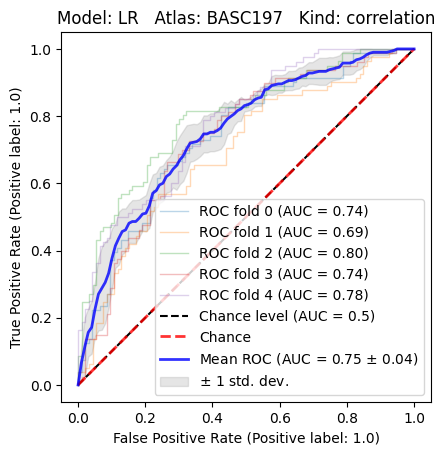

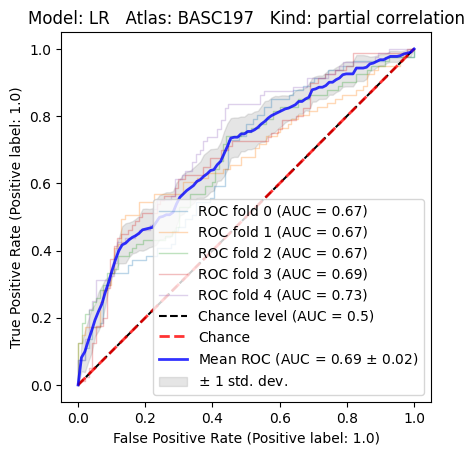

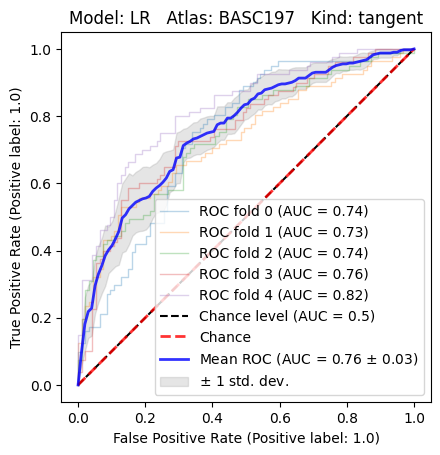

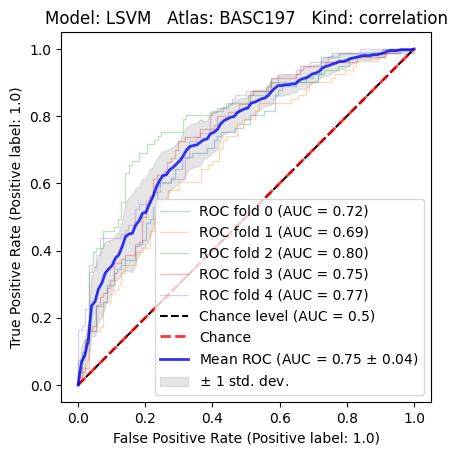

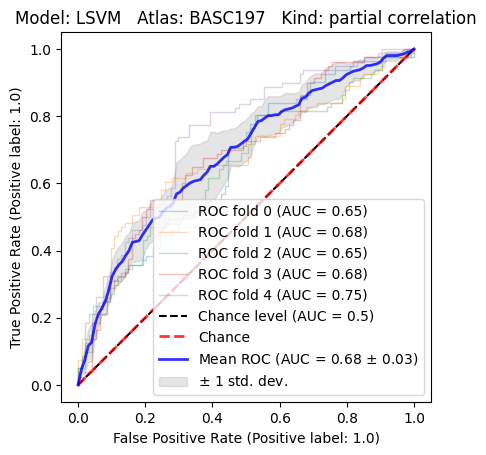

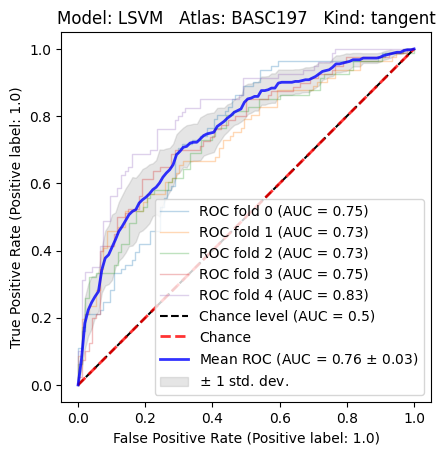

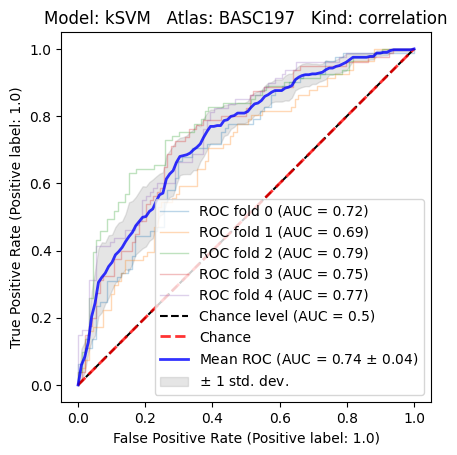

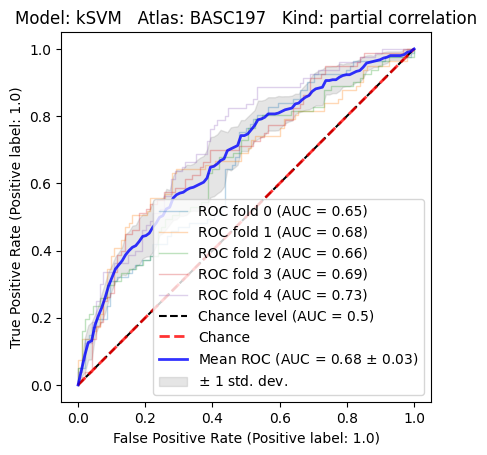

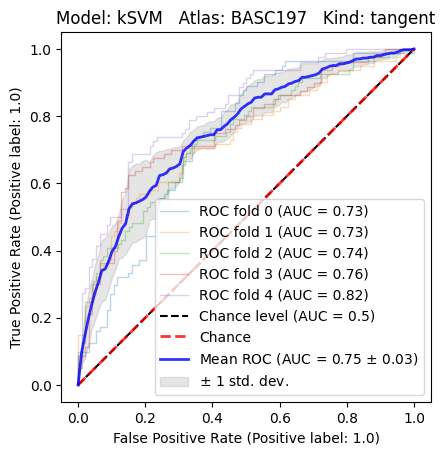

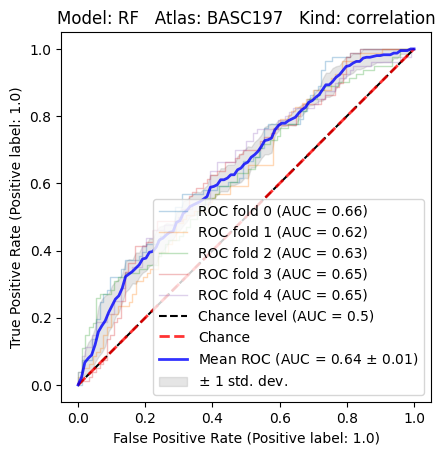

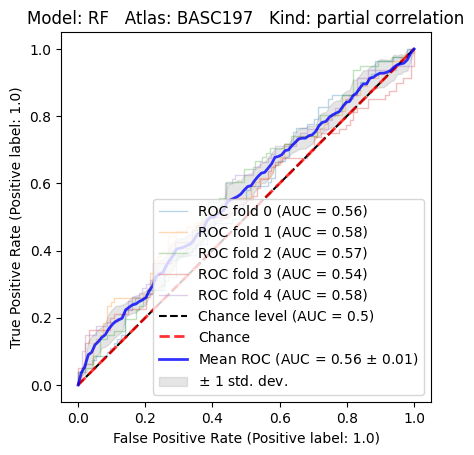

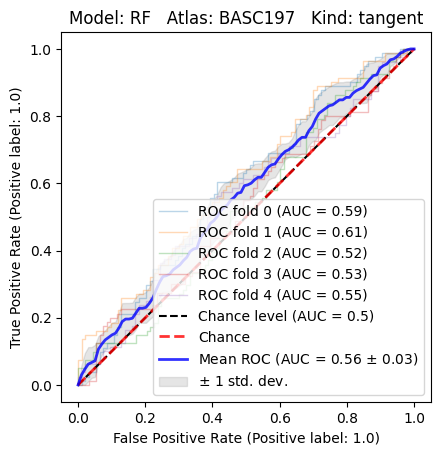

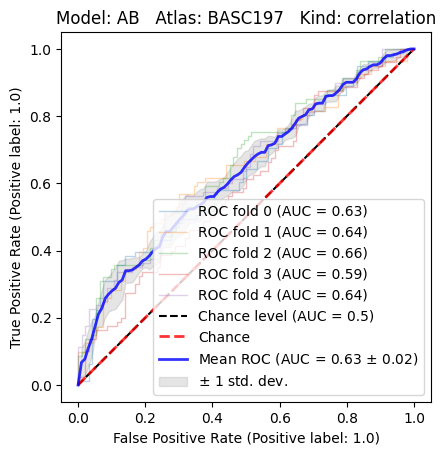

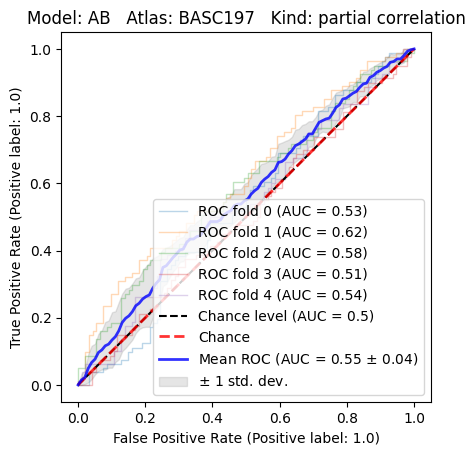

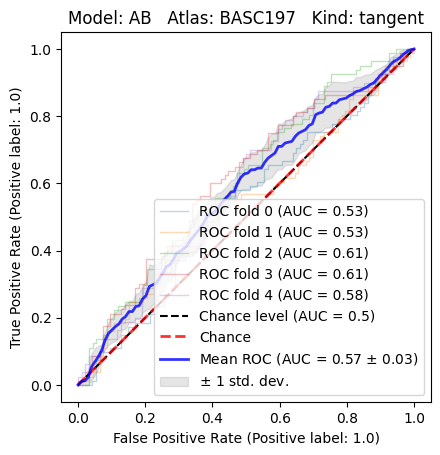

Test:


In [13]:
simulation_on_origin()

graph features


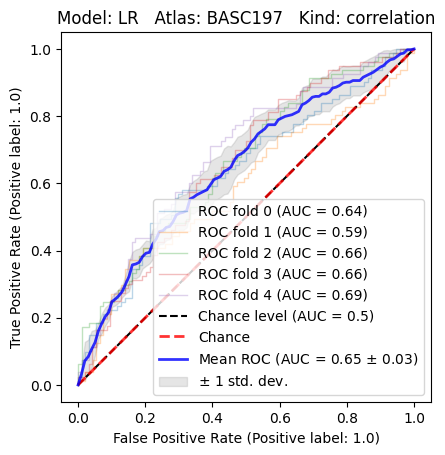

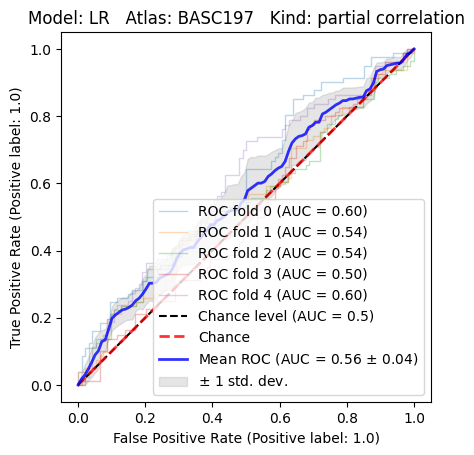

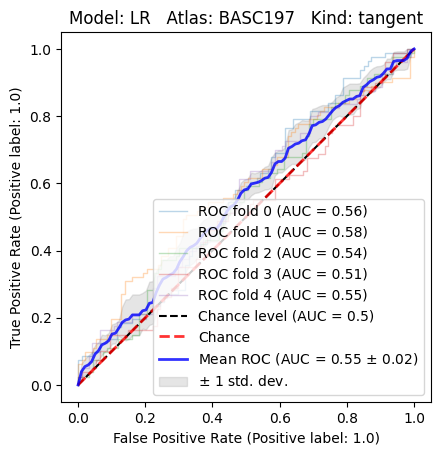

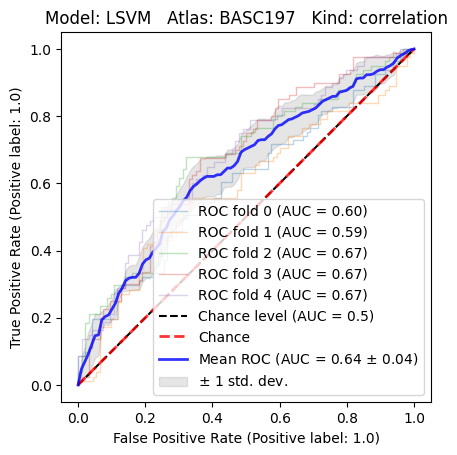

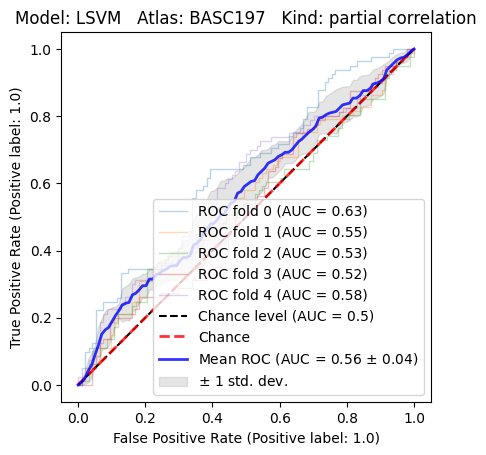

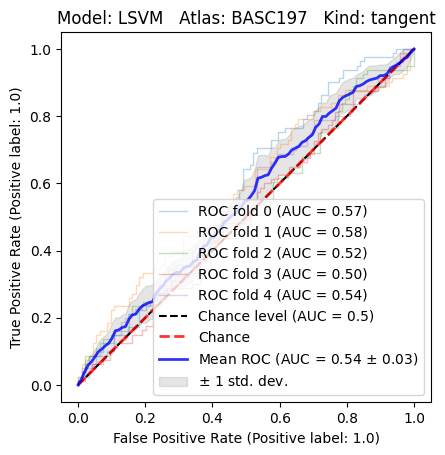

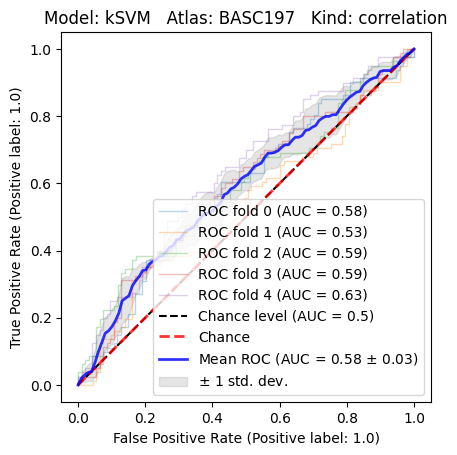

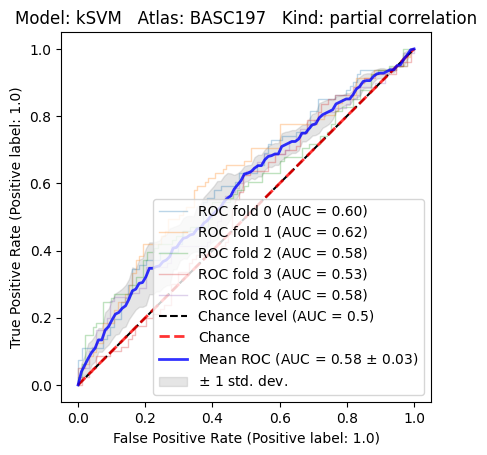

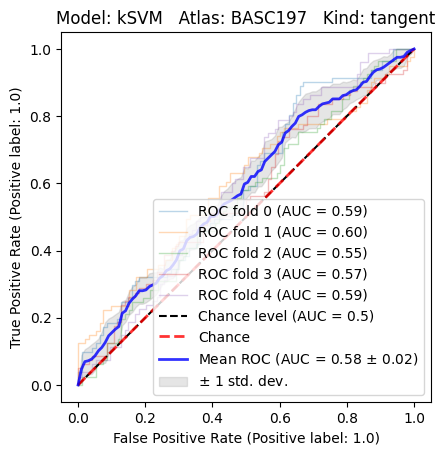

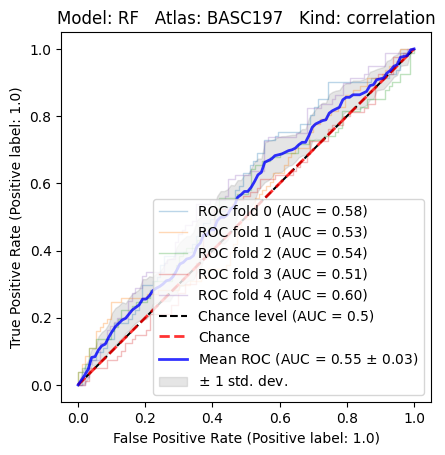

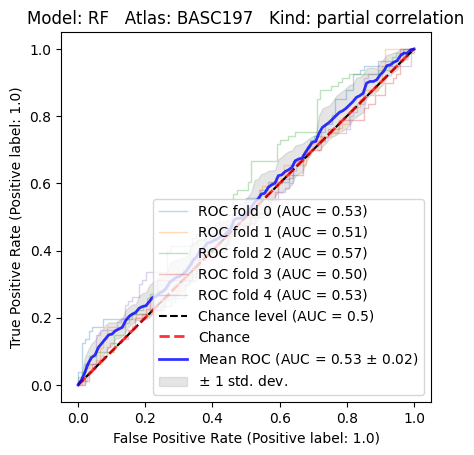

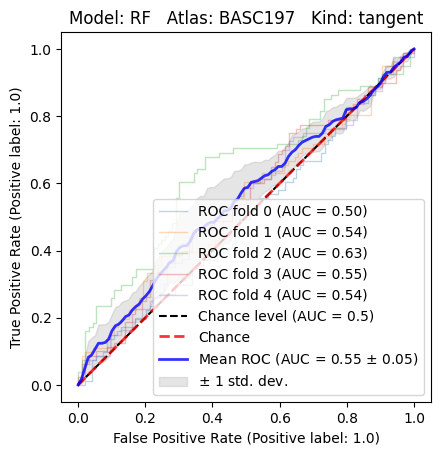

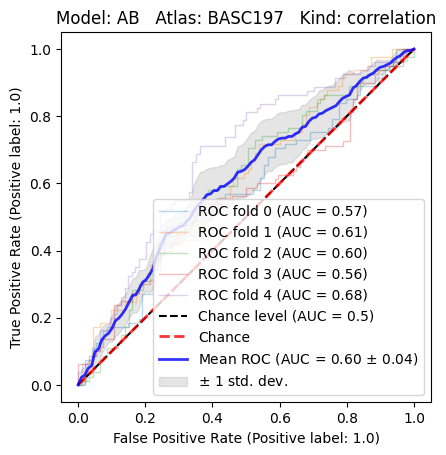

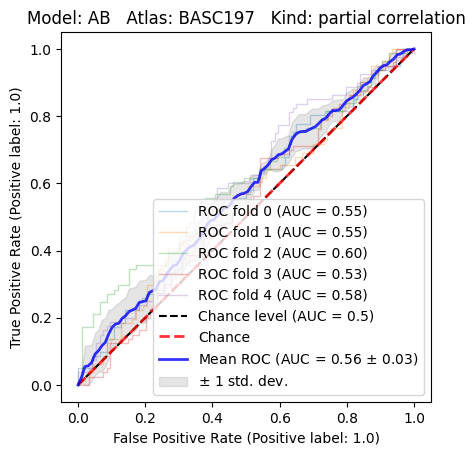

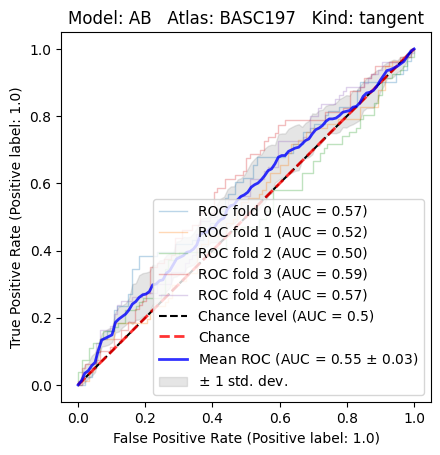

Test:


In [14]:
simulation_on_graph()

both


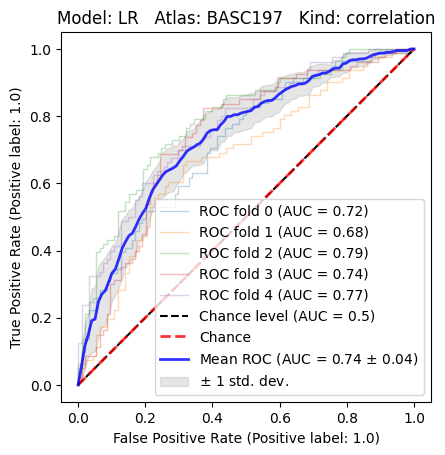

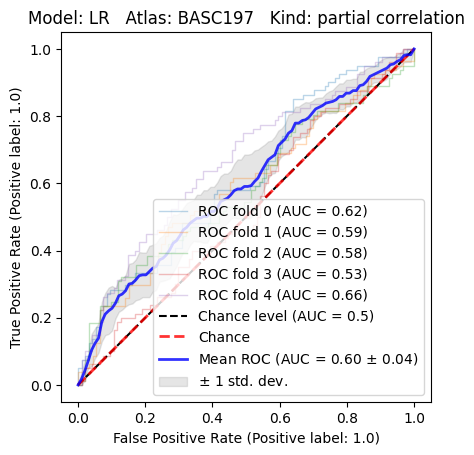

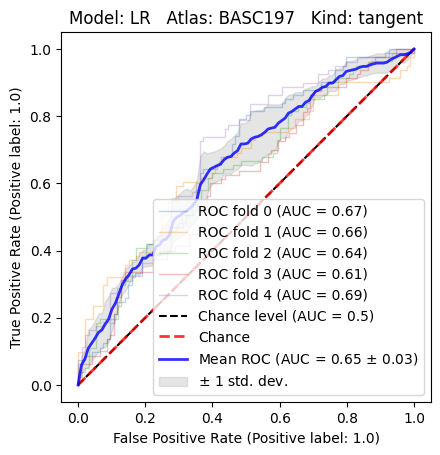

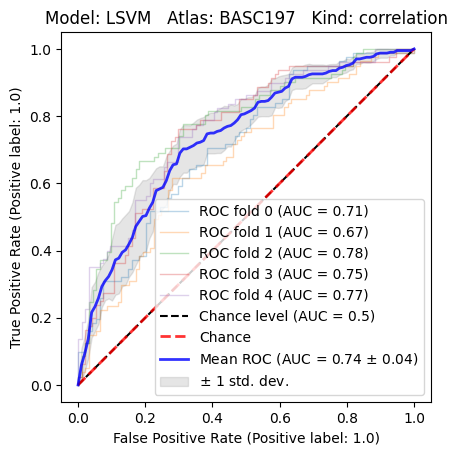

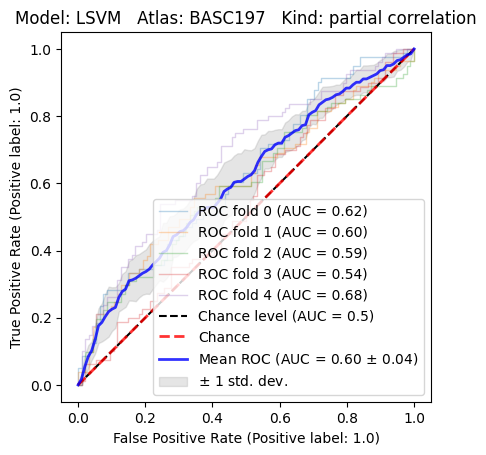

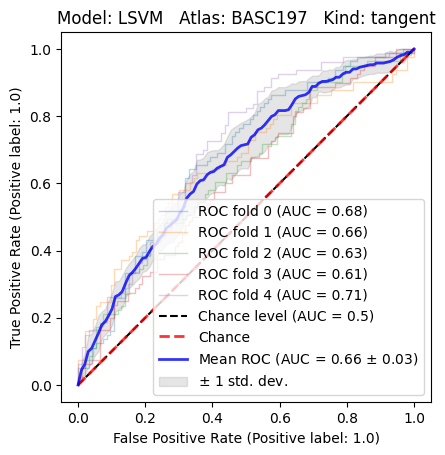

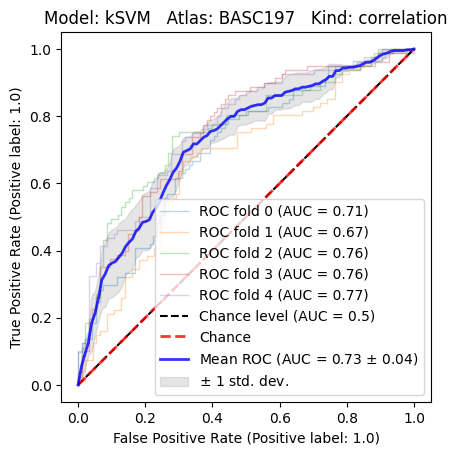

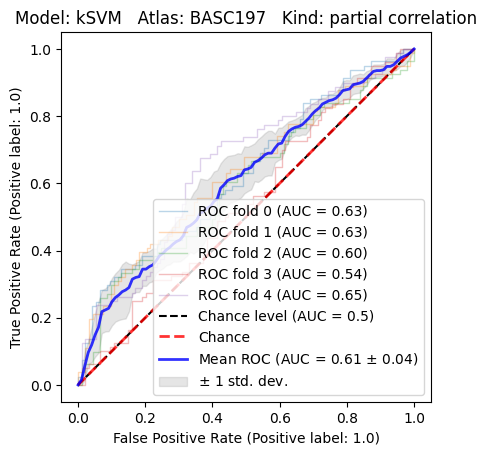

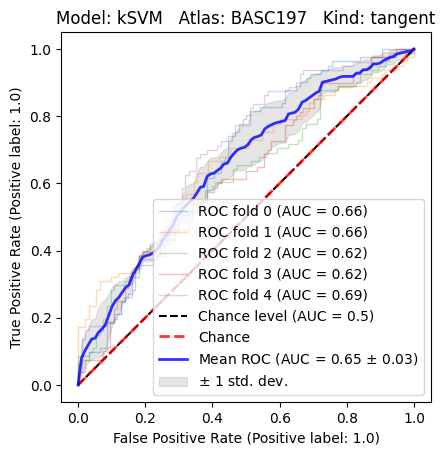

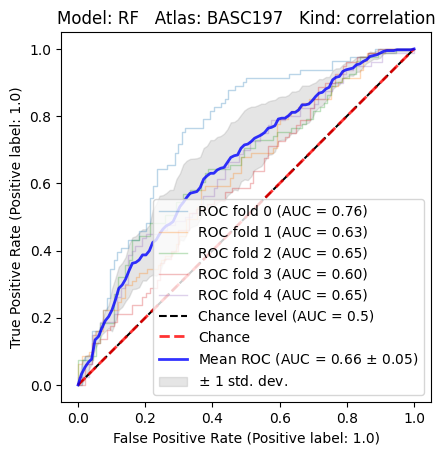

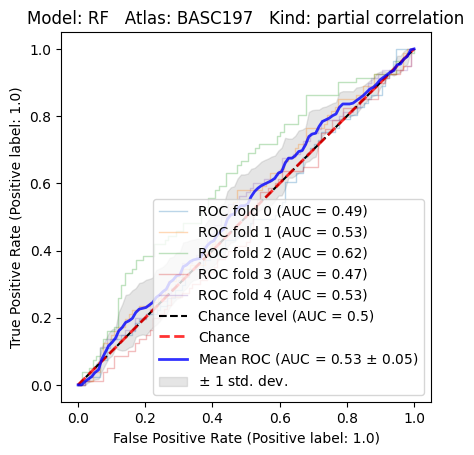

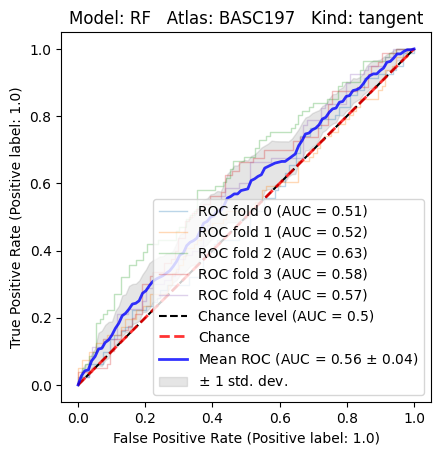

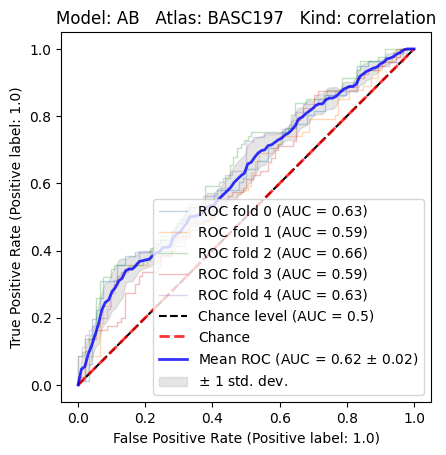

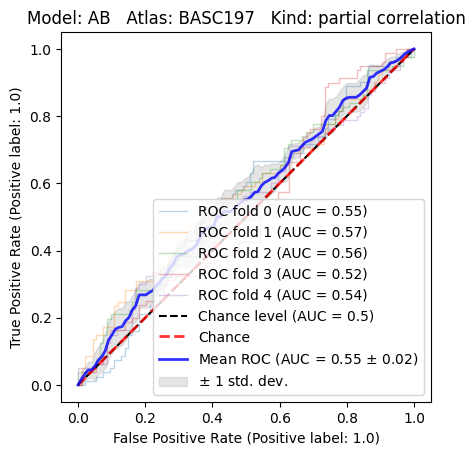

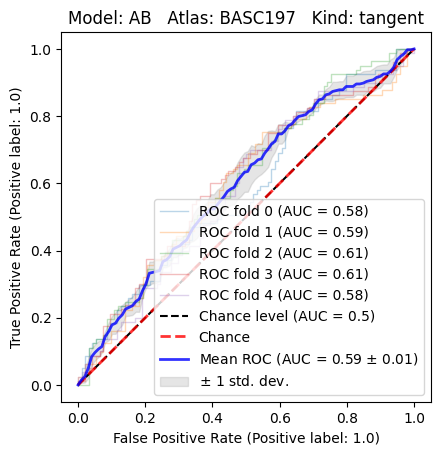

Test:


In [15]:
simulation_on_both()

In [16]:
2+2

4